In [152]:
import numpy as np
import pandas as pd
# im
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

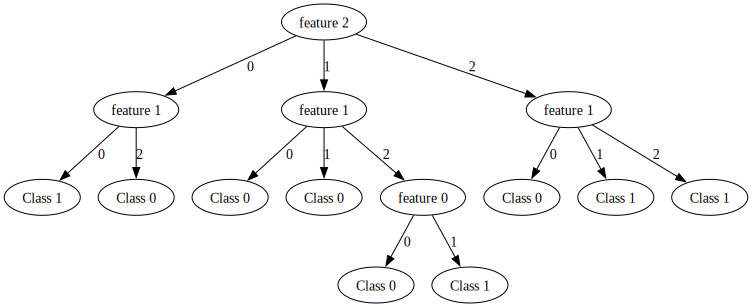

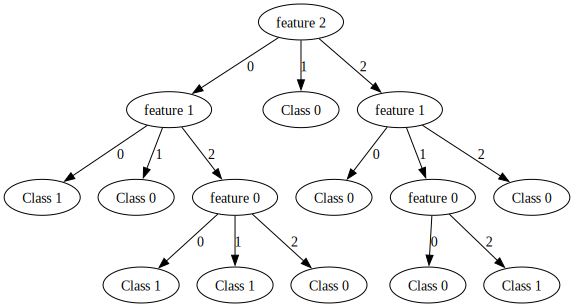

In [228]:
n=20
X=np.random.randint(0,3,size=(n,3))
y=np.random.randint(0,2,size=(n,1))
tree=ID3(X,y,verbose=False)
plot_tree(tree)

[[1. 1. 1.]]
[[1. 1. 0.]]
[[1. 0. 0.]]
[[1. 1. 0.]]


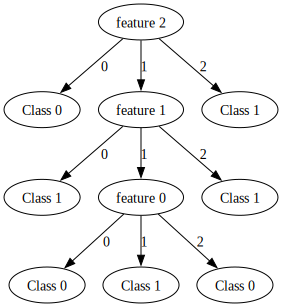

In [3]:
def entropy_binary(p,n):
    '''higher entropy means more equal dataset, is from 0 to 1'''
    N=p+n
    p/=N
    n/=N

    return -(p*np.log2(p)+n*np.log2(n))

def entropy_prob(p_array):
    '''higher entropy means more equal dataset, is from 0 to 1'''

    p_=p_array.astype('float64')

    N=np.sum(p_)
    p_/=N
    
    return -np.sum(p_*np.log2(p_))

def entropy(a):
    x,probs=np.unique(a,return_counts=True)
    return entropy_prob(probs)

k=np.array((9,5,2))
entropy(k)


1.584962500721156

In [4]:
x=np.arange(3)

In [5]:
a = np.random.randint(0,5,size=(4,3))
a[:,0:1].shape

def mode(x):
    val,counts=np.unique(x,return_counts=True)
    return val[np.argmax(counts)]


In [6]:
class Node:
    def __init__(self):
        self.feature_index=None
        self.threshold=None
        self.value=None
        self.children=[]
        self.isroot=False
        self.isleaf=False
        self.samples=None
        





In [128]:
def gain(S,y,*,feature_index):
    '''calculates information gain'''
    A=feature_index
    old_entropy=entropy(y)
    n,m=S.shape
    S_A=S[:,A]
    vals=np.unique(S_A)
    new_entropy=0
    for v in vals:
        yv=y[S_A==v]
        new_entropy+=yv.shape[0]/n*entropy(yv)
    
    return old_entropy-new_entropy

def optimum_feature(X,y,*,features = None, ):
    n,m=X.shape
    
    if features is None:
        features=np.ones(m)
    
    # m=features.shape[0]
    max_feature=None
    max_gain=-1
    # print("Gains follow : ")
    for i in range(m):
        if features[i]==0:
            continue
        gain1=gain(X,y,feature_index=i)
        # print(i, gain1.item())
        if i==0 or max_gain<gain1:
            max_feature=i

    return max_feature

In [84]:
optimum_feature(X,y,features=None)

0

In [145]:
vals,counts=np.unique(y,return_counts=1)
if counts.shape[0]==1:
#     print(counts[0])
print(counts.shape[0])


2


In [ ]:
def discretise(X,num_bins):
    

In [229]:

k=1
X1=[]
y1=[]
f1=[]
f0=2

def ID3(X,y,*,features=None,verbose=False):
    '''features = -1 to include all features, else pass features array'''
    global k
    global X1
    global y1

    global f0
    if verbose:
        pass
        print("\ncalled with step",k)
        
    n,m=X.shape
    if features is None:
        features=np.ones((m,1))
    # print("yo me step 2 and ",features.shape)
    if (k==2):
        X1=X
        y1=y
        
        f1=features
        # print(f1)
    else:
        f0=features
    k+=1
    root=Node()
    root.samples=n
    root.isroot=True
    root.isleaf=True

    vals,counts=np.unique(y,return_counts=1)
    if counts.shape[0]==1:
        root.value=y[0]
        if verbose:
            print("single class left")
        
        return root
    
    elif np.sum(features)==0:
        root.value=mode(y)
        
        if verbose:
            
            print("Out of features")
        return root
    root.isleaf=False
    feature_index=optimum_feature(X,y,features=features)
    root.feature_index=feature_index
    

    S_A=X[:,feature_index]
    if verbose:
        print("optimum feature is ",feature_index)
    # print(features.T)
    vals,counts=np.unique(S_A,return_counts=True)
    if counts.shape[0]==1:
        # root.value=y[0]
        if verbose:
            print("single class left")

        # child = Node()
        root.isleaf=True
        # root.samples=
        root.value=mode(y)
        return root
    for v in vals:

        mask=(S_A==v)
        yv=y[mask]
        Xv=X[mask]

        if Xv.shape[0]==0:
            child = Node()
            child.isleaf=True
            child.samples=0
            child.value=mode(y)
        else:
            features[feature_index]=0
            # print("calling ",features.T)
            child=ID3(Xv,yv,features=features)
        child.threshold=v
        root.children.append(child)
        
    features[feature_index]=1
    return root
        
        # new_entropy+=yv.shape[0]/n*entropy(yv)
    

head=ID3(X,y,features=None)
        
        
    

In [187]:
def train(X,y,model='ID3',verbose=False):
    if model=='ID3':
        return ID3(X,y,verbose=False)

In [191]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data[:,2:]
y=iris.target

In [192]:
tree=train(X,y,verbose=False)
plot_tree


called with step 15
optimum feature is  1
[[1. 1.]]

called with step 16
single class left

called with step 17
single class left

called with step 18
single class left

called with step 19
single class left

called with step 20
single class left

called with step 21
single class left

called with step 22
single class left

called with step 23
single class left

called with step 24
single class left

called with step 25
single class left

called with step 26
optimum feature is  0
[[1. 0.]]

called with step 27
single class left

called with step 28
single class left

called with step 29
single class left

called with step 30
single class left

called with step 31
single class left

called with step 32
single class left

called with step 33
optimum feature is  0
[[1. 0.]]

called with step 34
single class left

called with step 35
single class left

called with step 36
single class left

called with step 37
single class left

called with step 38
single class left

called with step 39
s

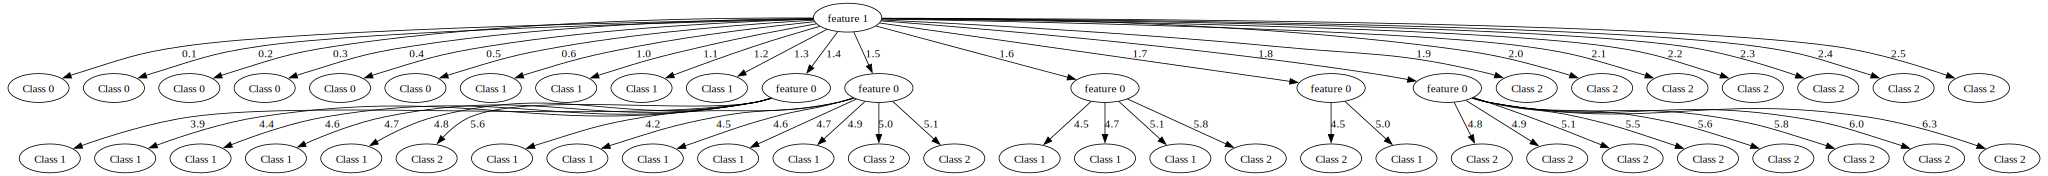

In [195]:


def plot_node(root,dot,k,parent):
    root_id=str(k)
    dot.node(root_id,'feature '+str(root.feature_index))  
    k+=1

    # if (k!=0)

    l=len(root.children)
    for i in range(l):
        # dot.node(str(i),'feature')
        child=root.children[i]
        
        
        if child.isleaf:
            text='Class '+str(child.value).strip('[]')
            dot.node(str(k),text)
            dot.edge(root_id,str(k),str(child.threshold))
            k+=1
        else:
            dot,k=plot_node(child,dot,k,root_id)
    if parent is not None:
        dot.edge(parent,root_id,str(root.threshold))

    return dot,k


def plot_tree(root,k=0,*,render_flag=False):
    dot=graphviz.Digraph()
    dot,k=plot_node(root,dot,k,None)
    if render_flag==True:
        dot.render('Tree',format='png',cleanup=True,view=True)
    return dot

dot=plot_tree(head)
dot

In [200]:
vals,counts=np.unique(X,return_counts=True)
vals

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
       1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 3. , 3.3, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.3,
       6.4, 6.6, 6.7, 6.9])

[]

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1]])

NameError: name 'X' is not defined

(0,)

array([0, 1, 2, 3, 4])

0.04812703040826949

(array([[1, 0, 0],
        [1, 2, 2],
        [2, 1, 1],
        [0, 1, 2],
        [0, 2, 1],
        [0, 0, 1],
        [0, 2, 1],
        [1, 0, 2],
        [1, 2, 1],
        [0, 2, 2],
        [0, 1, 2],
        [0, 2, 0],
        [0, 1, 2],
        [2, 1, 1]]),
 array([[1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0]]))

(4,)

(0, 1)

In [ ]:
S=np.array((9,5))
# S=np.array((9,5))


In [183]:
# example

# Create a Digraph object
dot = graphviz.Digraph()

# # Add nodes
dot.node('A', 'Feature 1 <= 5')
dot.node('B', 'Class 0')
dot.node('C', 'Feature 1 > 5')
dot.node('D', 'Feature 2 <= 3')
dot.node('E', 'Class 1')
dot.node('F', 'Class 2')

# # Add edges
dot.edge('A', 'B', label='True')
dot.edge('A', 'C', label='False')
dot.edge('C', 'D', label='True')
dot.edge('C', 'F', label='False')
dot.edge('D', 'E', label='True')
dot.edge('D', 'F', label='False')

# Render the graph
# dot.render('sample_tree', format='png', cleanup=True,view=True)
# graph.render(directory='doctest-output', view=True) #for saving

'sample_tree.png'